In [1]:
import numpy as np
from time import time
import os
import sys
import scipy
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from scipy.interpolate import interp1d
import pandas as pd
import psutil
import scipy as sp
import scipy.ndimage
from tqdm import tqdm
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import bigbadbrain as bbb
from scipy.linalg import toeplitz
import scipy.linalg as sl
from scipy.signal import convolve2d
from scipy.signal import convolve
import sklearn
from sklearn.linear_model import LassoLarsIC
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.decomposition import FastICA

from skimage.filters import threshold_triangle
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages')
import cv2

import statsmodels.api as sm

%matplotlib inline
plt.rcParams.update({'font.size': 20})

# Load Brain

In [2]:
directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_19/func_0'

In [3]:
brain_path = os.path.join(directory, 'brain_zscored_green.nii')
brain = bbb.load_numpy_brain(brain_path)
dims = bbb.get_dims(brain)
print('brain shape is x,y,z,t {}'.format(brain.shape))


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 16.51 sec
brain shape is x,y,z,t (128, 84, 49, 4554)


In [4]:
t0 = time()
X = brain.reshape(-1,brain.shape[-1]).T
brain = None
print('X is time by voxels {}'.format(X.shape))
print('Reshape duration: {}'.format(time()-t0))

X is time by voxels (4554, 526848)
Reshape duration: 86.75784611701965


In [27]:
print('started')
t0 = time()
transformer = FastICA(n_components=2000, random_state=0)
X_transformed = transformer.fit_transform(X)
print(X_transformed.shape)
print('Duration: {}'.format(time()-t0))

started
(4554, 2000)
Duration: 2654.7798776626587


In [26]:
save_dir = os.path.join(directory, 'ICA','ica_100.npy')
np.save(save_dir, X_transformed)

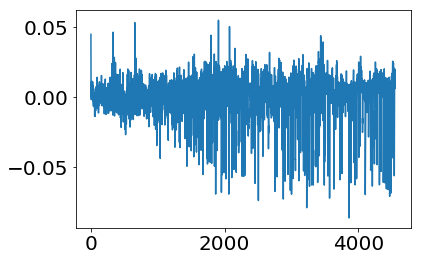

In [25]:
plt.plot(X_transformed[:,14])